In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas
import folium
from countryinfo import CountryInfo
import requests
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
plt.rc('font', size=12)

/Users/vayner/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
purities = pd.read_csv("datasets/purities.csv", delimiter=",", decimal=",")

purities = purities.replace("Türkiye", "Turkey")
purities = purities.replace("Iran (Islamic Republic of)", "Iran")
purities = purities.replace("Bolivia (Plurinational State of)", "Bolivia")
purities = purities.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
purities = purities.replace("Bahamas", "The Bahamas")
purities = purities.replace("Venezuela (Bolivarian Republic of)", "Venezuela")
purities = purities.replace("Russian Federation", "Russia")
purities = purities.replace("Côte d'Ivoire", "Ivory Coast")
purities = purities.replace("Lao People's Democratic Republic", "Laos")
purities = purities.replace("Republic of Korea", "South Korea")
purities = purities.replace("Viet Nam", "Vietnam")
purities = purities.replace("Serbia", "Republic of Serbia")
purities = purities.replace("Republic of Moldova", "Moldova")
purities = purities.replace("Syrian Arab Republic", "Syria")
purities = purities.replace("China, Macao SAR", "China")
purities = purities.replace("China, Hong Kong SAR", "Hong Kong")
purities = purities.replace("China, Taiwan Province of China", "Taiwan")
purities = purities.replace("Timor-Leste", "East Timor")
purities = purities.replace("North Macedonia", "Macedonia")
purities = purities.replace("Czechia", "Czech Republic")
purities = purities.replace("State of Palestine", "Israel") # giga sadeg

purities['Typical purity'] = pd.to_numeric(purities['Typical purity'], errors='coerce')
purities['Maximum purity'] = pd.to_numeric(purities['Maximum purity'], errors='coerce')
purities['Minimum purity'] = pd.to_numeric(purities['Minimum purity'], errors='coerce')
purities = purities[purities['Country/Territory'] != 'Belgium']

purities = purities[purities['Drug'] == 'Cocaine']
def przefiltruj_nulle_df(df, kolumna1, kolumna2, kolumna3):
    filtered_df = df[(~df[kolumna1].isnull()) | (~df[kolumna2].isnull() & ~df[kolumna3].isnull())]
    return filtered_df

def podmien_null_na_srednia(df, kolumna_z_null, kolumna1, kolumna2):
    df[kolumna_z_null].fillna((df[kolumna1] + df[kolumna2]) / 2, inplace=True)
    return df

purities = przefiltruj_nulle_df(purities, 'Typical purity', 'Maximum purity', 'Minimum purity')
purities = podmien_null_na_srednia(purities, 'Typical purity', 'Maximum purity', 'Minimum purity')

In [3]:
def filtrowanie(df, kolumna, wartosc):
    filtered_df = df[df[kolumna] == wartosc]
    return filtered_df

streetPurities = filtrowanie(purities, 'LevelOfSale', 'Street')
wholesalePurities = filtrowanie(purities, 'LevelOfSale', 'Wholesale')


/var/folders/53/mk2f0x450cs16rt_s6h4bj1m0000gn/T/ipykernel_24682/3542307724.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subRegionWholesale['SubRegion'], rotation=45)


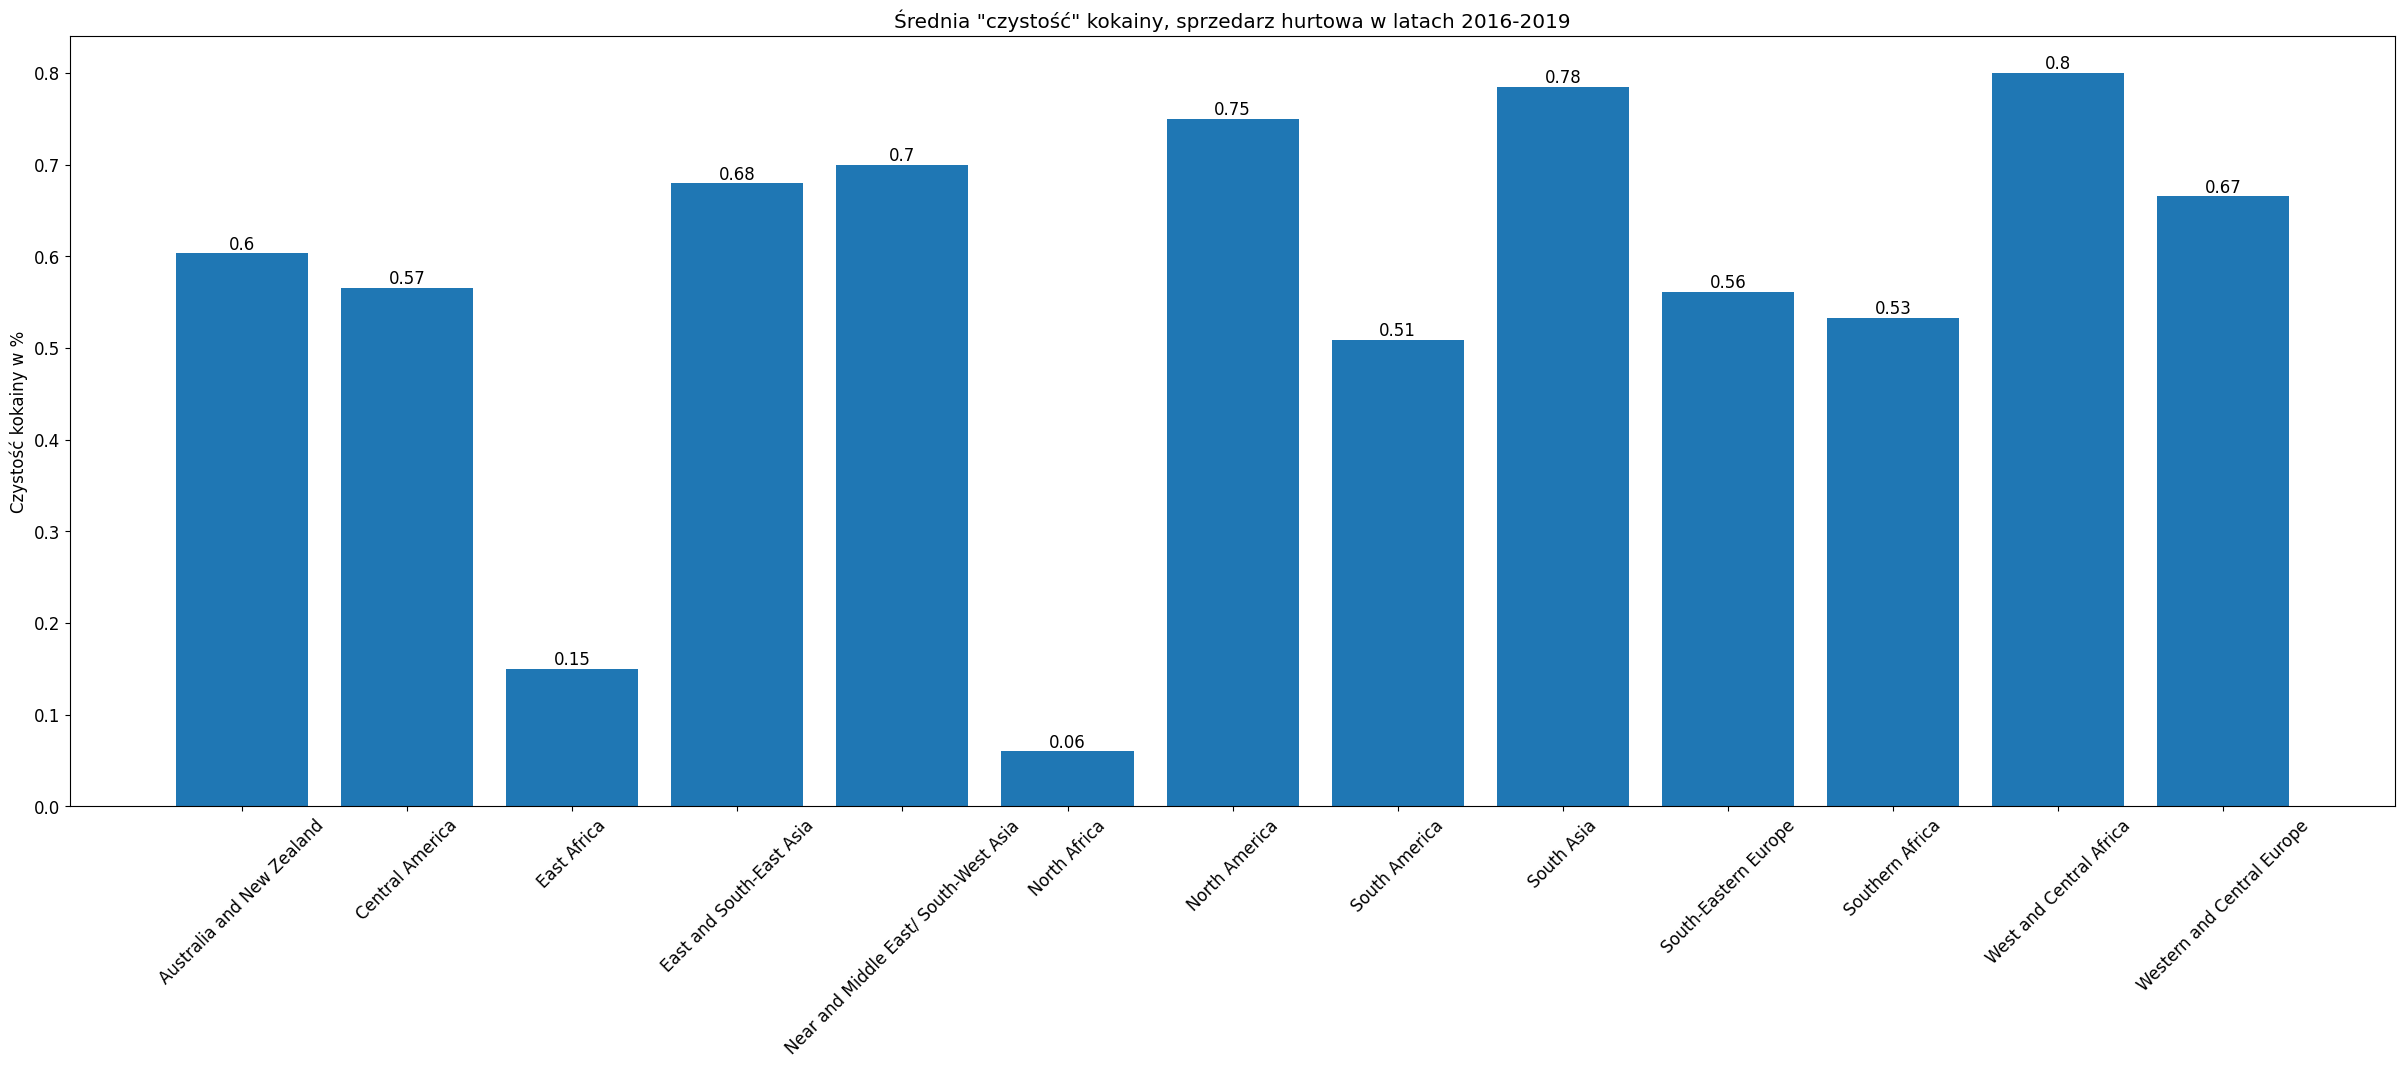

In [4]:
subRegionWholesale = wholesalePurities.groupby('SubRegion')['Typical purity'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(subRegionWholesale['SubRegion'], subRegionWholesale['Typical purity'])

# Dodawanie liczb na słupkach
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = round(subRegionWholesale['Typical purity'][i], 2)
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            value,
            ha='center', va='bottom')

ax.set_ylabel('Czystość kokainy w %')
ax.set_title('Średnia "czystość" kokainy, sprzedarz hurtowa w latach 2016-2019')
ax.set_xticklabels(subRegionWholesale['SubRegion'], rotation=45)

# Wyświetlanie wykresu
plt.show()

/var/folders/53/mk2f0x450cs16rt_s6h4bj1m0000gn/T/ipykernel_24682/3491411698.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subRegionStreet['SubRegion'], rotation=45)


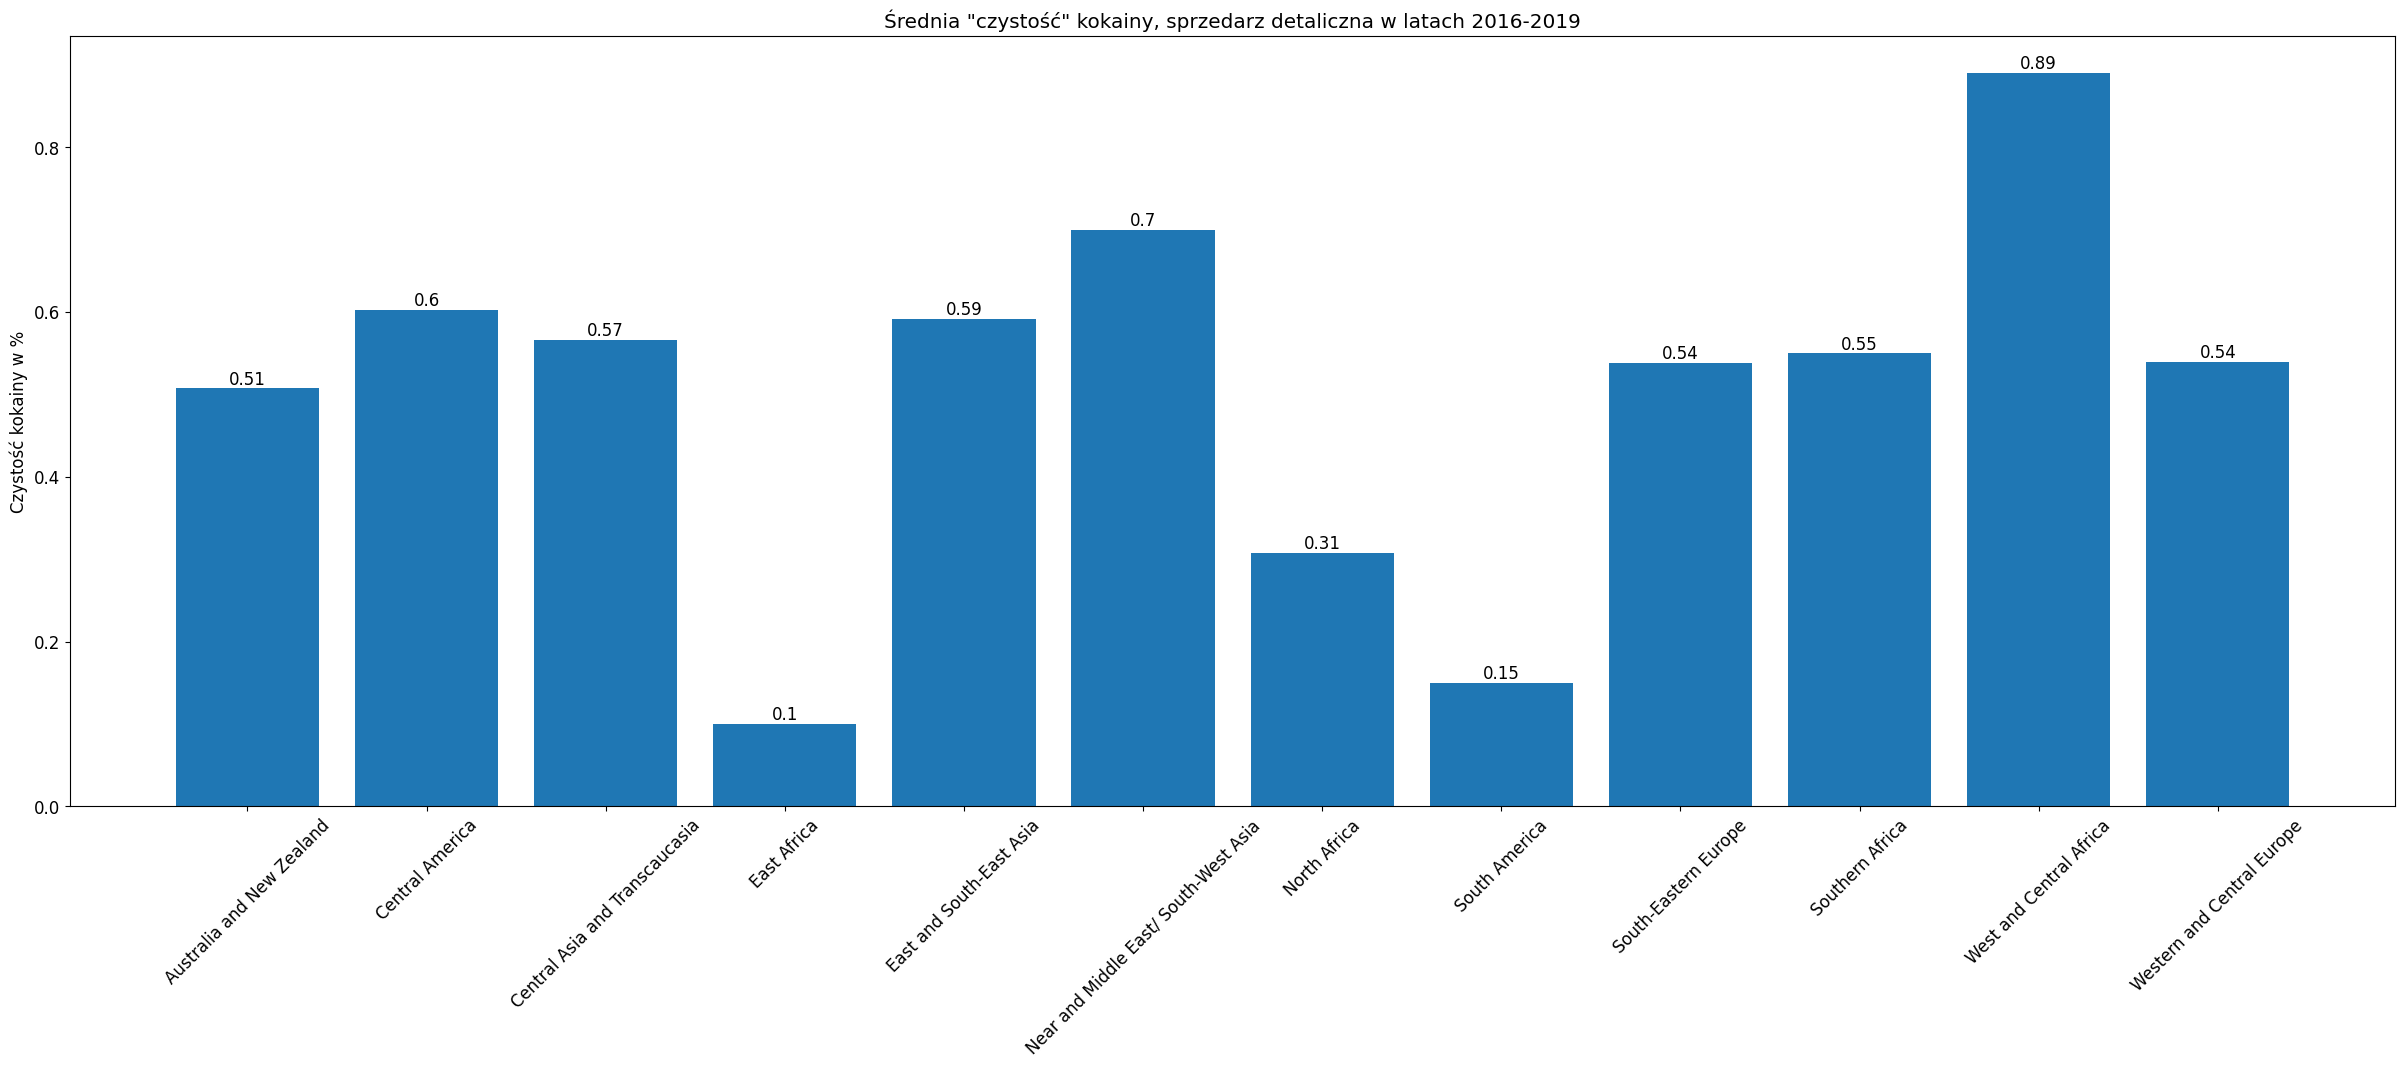

In [5]:
subRegionStreet = streetPurities.groupby('SubRegion')['Typical purity'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(subRegionStreet['SubRegion'], subRegionStreet['Typical purity'])

# Dodawanie liczb na słupkach
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = round(subRegionStreet['Typical purity'][i], 2)
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            value,
            ha='center', va='bottom')

ax.set_ylabel('Czystość kokainy w %')
ax.set_title('Średnia "czystość" kokainy, sprzedarz detaliczna w latach 2016-2019')
ax.set_xticklabels(subRegionStreet['SubRegion'], rotation=45)

# Wyświetlanie wykresu
plt.show()

/var/folders/53/mk2f0x450cs16rt_s6h4bj1m0000gn/T/ipykernel_24682/1528892779.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wholesalePuritiesEurope['Country/Territory'], rotation=45)


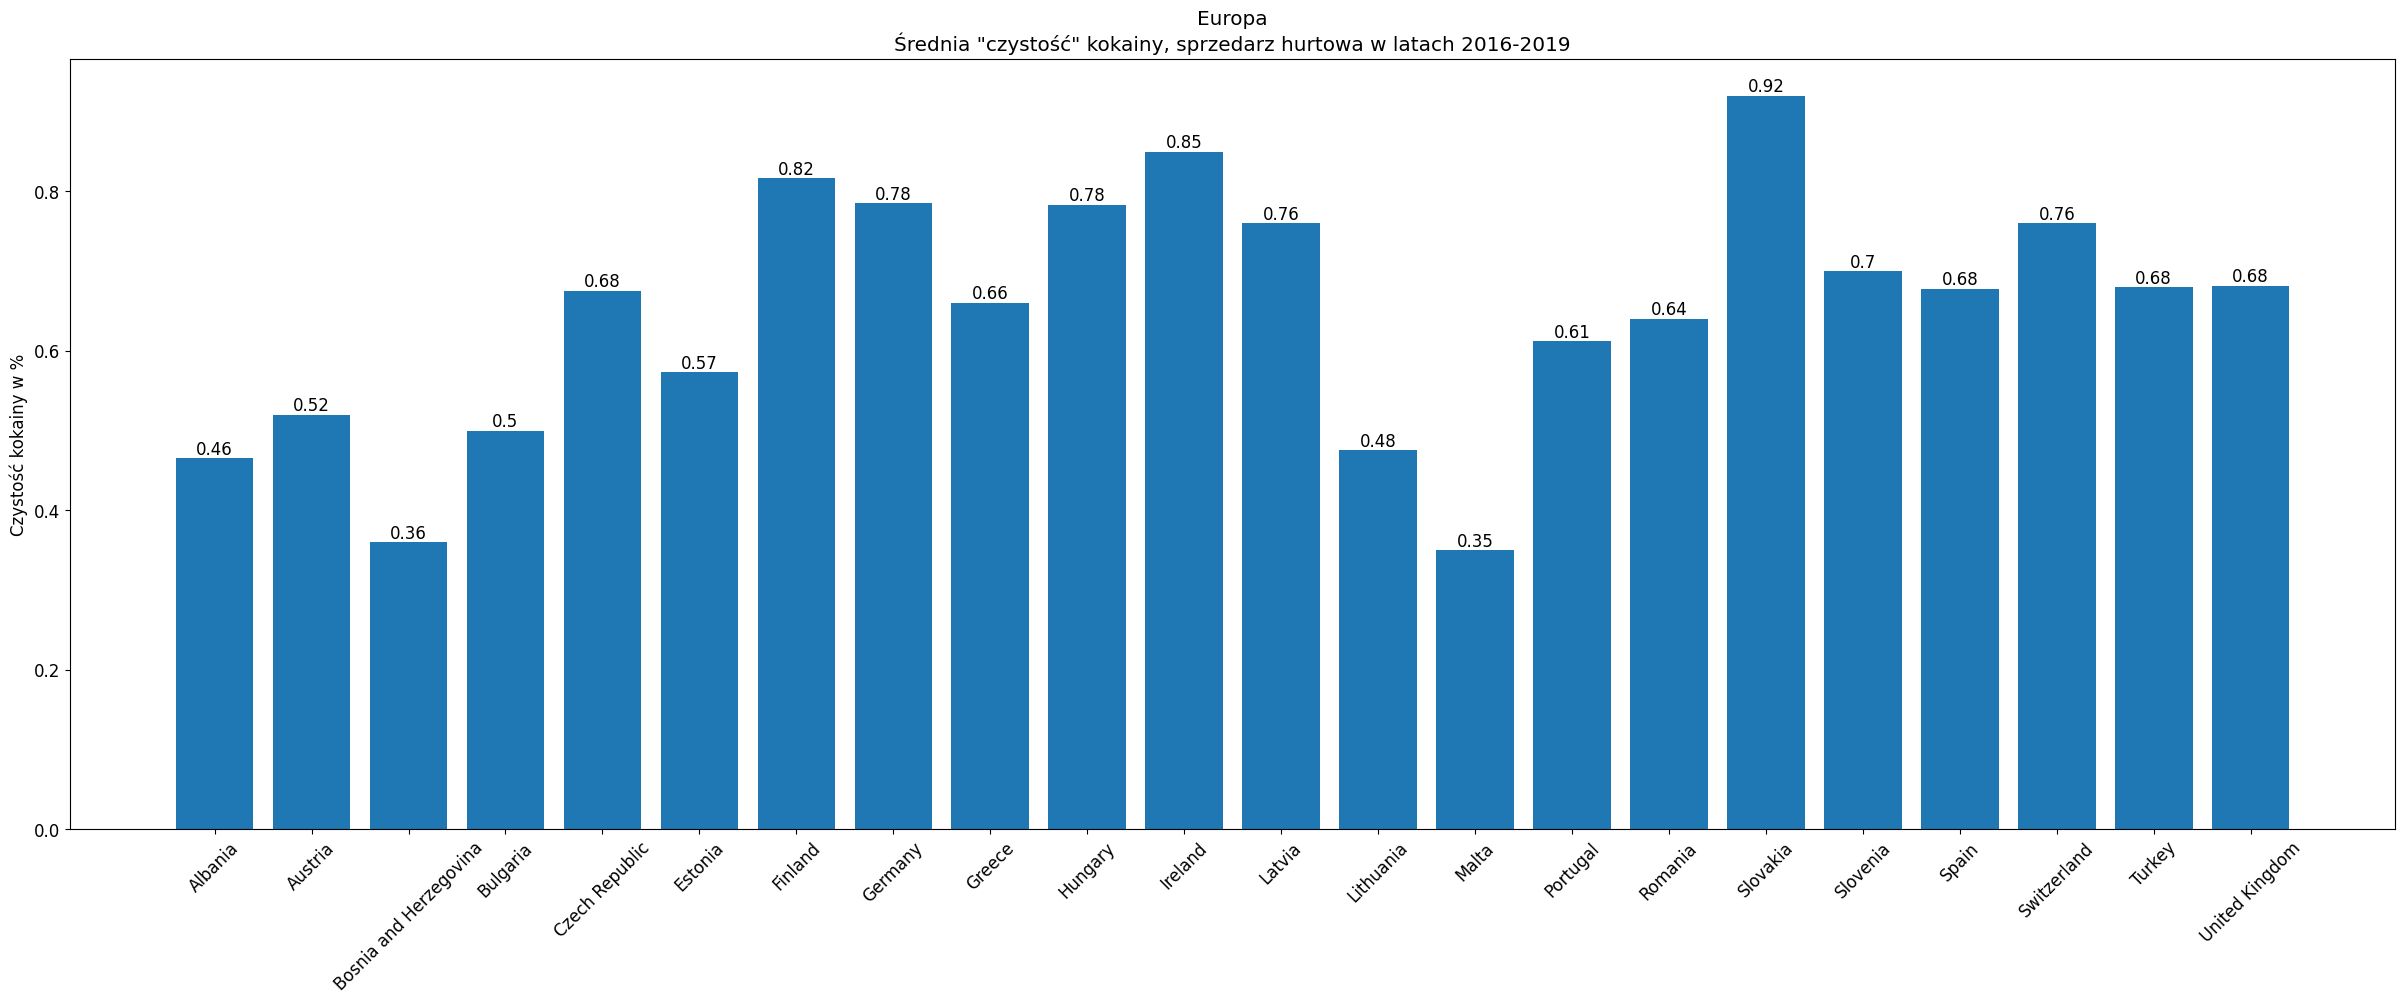

In [6]:
wholesalePuritiesEurope = wholesalePurities[wholesalePurities['Region'] == 'Europe']
wholesalePuritiesEurope = wholesalePuritiesEurope.groupby("Country/Territory")['Typical purity'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(wholesalePuritiesEurope['Country/Territory'], wholesalePuritiesEurope['Typical purity'])

# Dodawanie liczb na słupkach
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = round(wholesalePuritiesEurope['Typical purity'][i], 2)
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            value,
            ha='center', va='bottom')

ax.set_ylabel('Czystość kokainy w %')
ax.set_title('Europa\nŚrednia "czystość" kokainy, sprzedarz hurtowa w latach 2016-2019')
ax.set_xticklabels(wholesalePuritiesEurope['Country/Territory'], rotation=45)

# Wyświetlanie wykresu
plt.show()

/var/folders/53/mk2f0x450cs16rt_s6h4bj1m0000gn/T/ipykernel_24682/2863987436.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(streetPuritiesEurope['Country/Territory'], rotation=45)


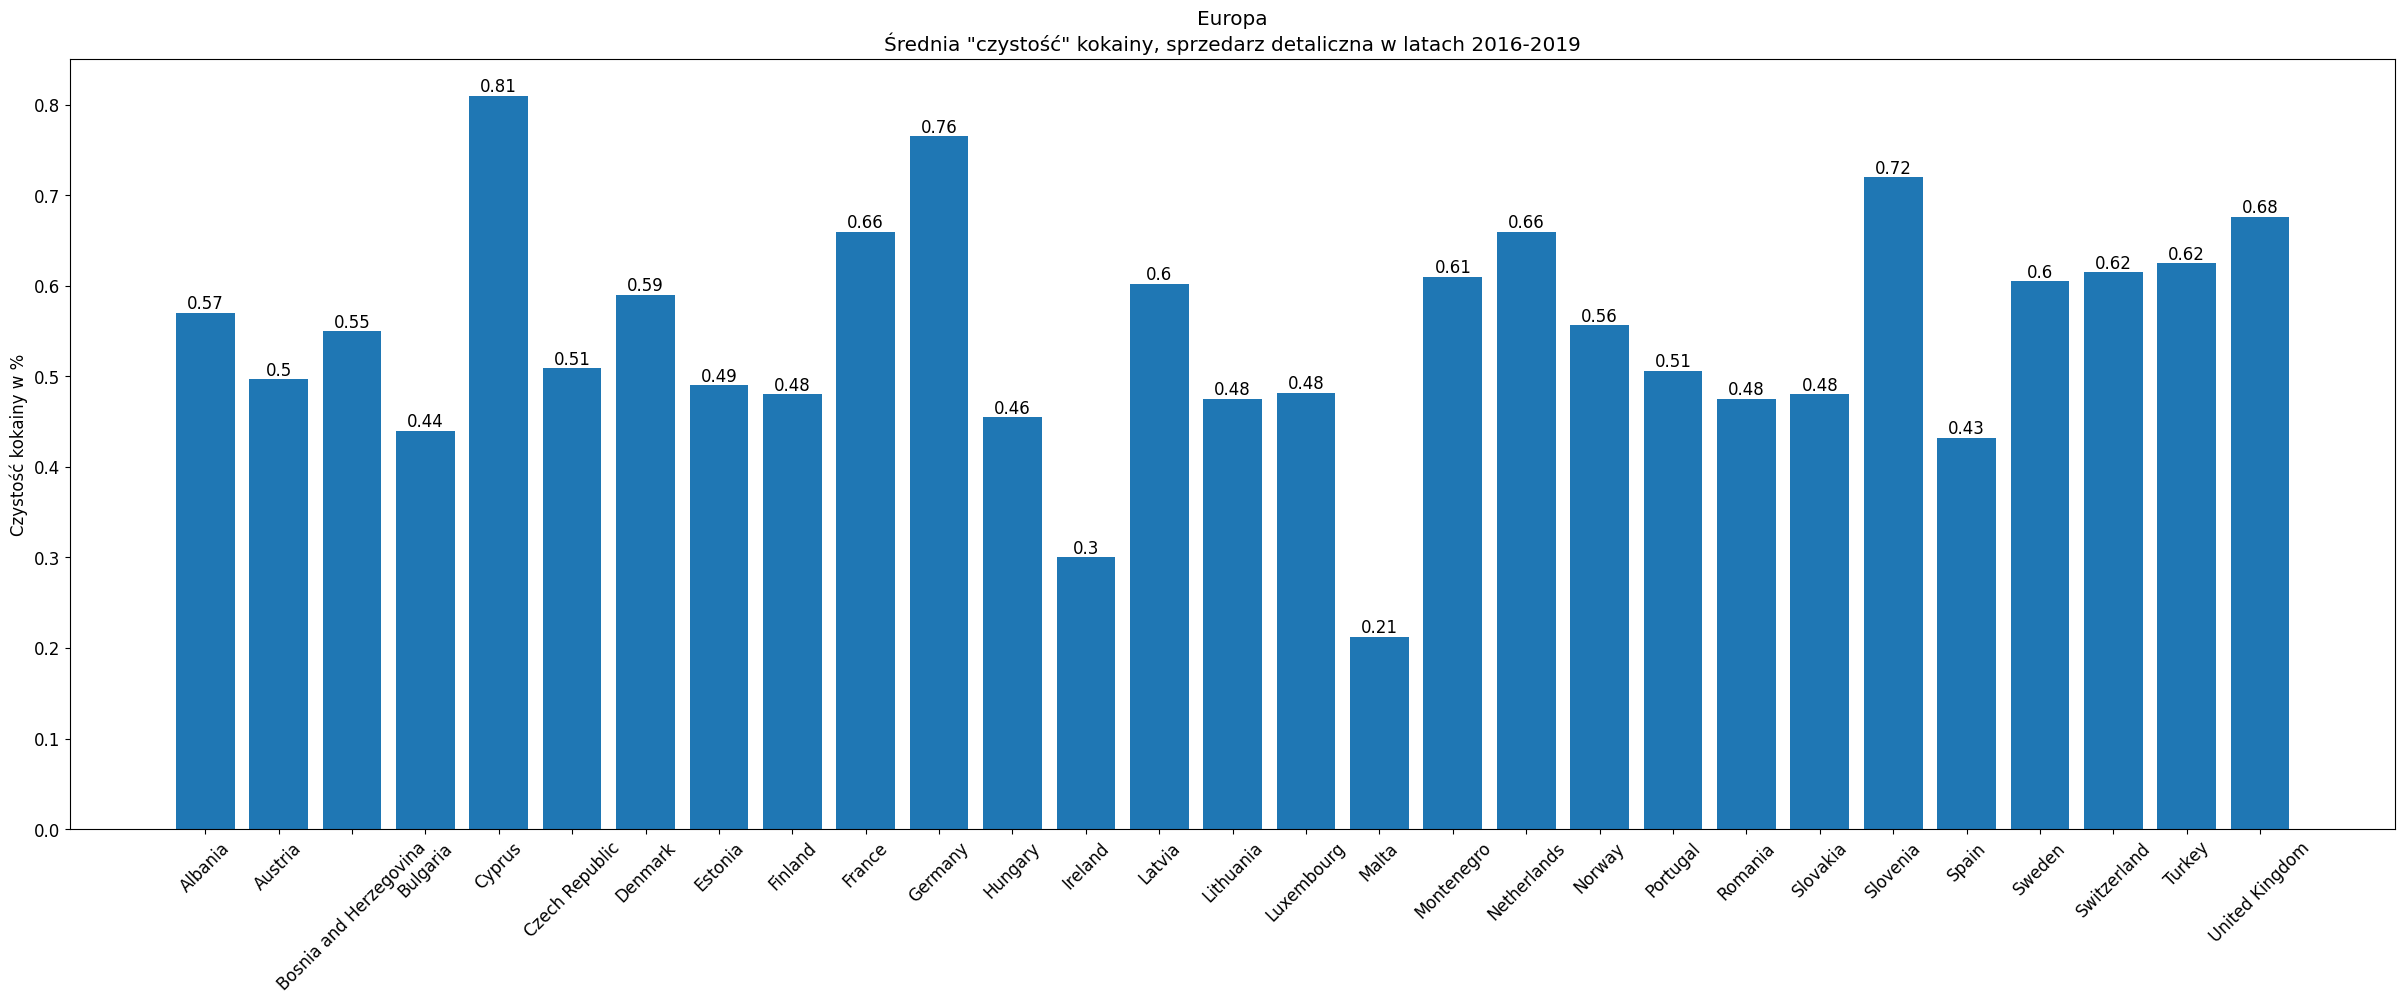

In [7]:
streetPuritiesEurope = streetPurities[streetPurities['Region'] == 'Europe']
streetPuritiesEurope = streetPuritiesEurope.groupby("Country/Territory")['Typical purity'].mean().reset_index()

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(streetPuritiesEurope['Country/Territory'], streetPuritiesEurope['Typical purity'])

# Dodawanie liczb na słupkach
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = round(streetPuritiesEurope['Typical purity'][i], 2)
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            value,
            ha='center', va='bottom')

ax.set_ylabel('Czystość kokainy w %')
ax.set_title('Europa\nŚrednia "czystość" kokainy, sprzedarz detaliczna w latach 2016-2019')
ax.set_xticklabels(streetPuritiesEurope['Country/Territory'], rotation=45)

# Wyświetlanie wykresu
plt.show()

/var/folders/53/mk2f0x450cs16rt_s6h4bj1m0000gn/T/ipykernel_24682/153290233.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(europeDifference['Country/Territory'], rotation=45)


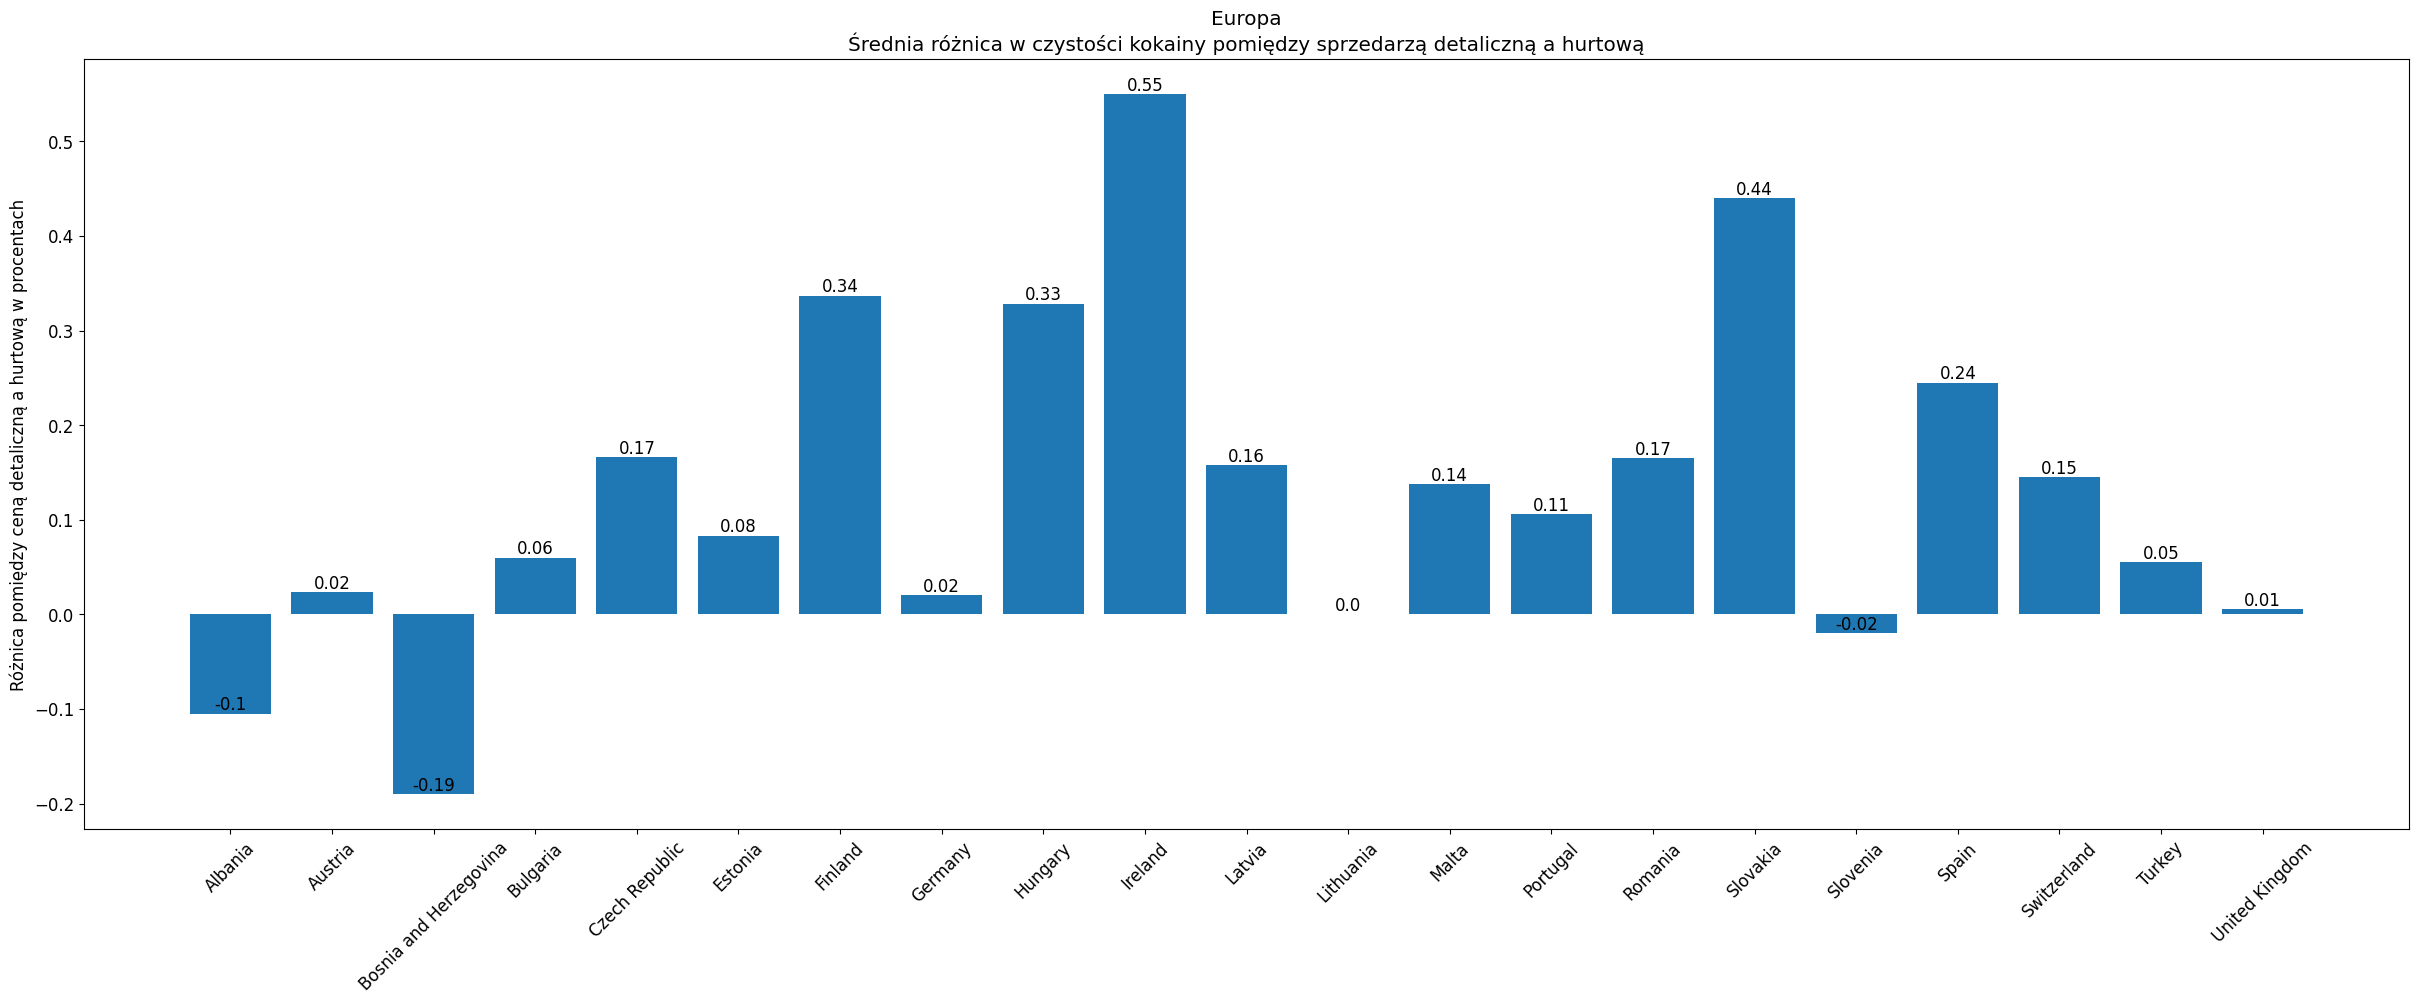

In [8]:
streetPuritiesEurope = streetPuritiesEurope.rename(columns={'Typical purity': 'detal'})
wholesalePuritiesEurope = wholesalePuritiesEurope.rename(columns={'Typical purity': 'hurt'})

europeDifference = pd.merge(wholesalePuritiesEurope, streetPuritiesEurope, on='Country/Territory', how='inner')

europeDifference['margin'] = europeDifference['hurt'] - europeDifference['detal']

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(europeDifference['Country/Territory'], europeDifference['margin'])

# Dodawanie liczb na słupkach
for i, bar in enumerate(bars):
    height = bar.get_height()
    value = round(europeDifference['margin'][i], 2)
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            value,
            ha='center', va='bottom')

ax.set_ylabel('Różnica pomiędzy ceną detaliczną a hurtową w procentach')
ax.set_title('Europa\nŚrednia różnica w czystości kokainy pomiędzy sprzedarzą detaliczną a hurtową')
ax.set_xticklabels(europeDifference['Country/Territory'], rotation=45)

# Wyświetlanie wykresu
plt.show()

In [9]:
def mapka(df, legend):
    map = folium.Map(height=700,location=[50, 10], zoom_start=4)
    df_world = geopandas.read_file("datasets/110m_cultural.zip").merge(
        df,
        how='right',
        left_on=['ADMIN'],
        right_on=['Country/Territory']
    )
    folium.Choropleth(
        geo_data=df_world,
        data=df_world,
        columns=['Country/Territory', 'Typical purity'],
        key_on="feature.properties.Country/Territory",
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend
    ).add_to(map)
    return map

wholesalePuritiesAverage = wholesalePurities.groupby('Country/Territory')['Typical purity'].mean()

mapka(wholesalePuritiesAverage.reset_index(), '"Czystość" kokainy w % w przypadku sprzedarzy hurtowej')

In [10]:
streetPuritiesAverage = streetPurities.groupby('Country/Territory')['Typical purity'].mean()
df = streetPuritiesAverage.reset_index()
mapka(df, '"Czystość" kokainy w % w przypadku sprzedarzy detalicznej')